In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Exercise 0.1: Plotting

In [7]:
X = np.arange(-1., 1.0, 0.1)  # This does not include the end point !!!
print(X)

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01]


In [8]:
X = np.arange(-1., 1.1, 0.1)
print(X)

[-1.00000000e+00 -9.00000000e-01 -8.00000000e-01 -7.00000000e-01
 -6.00000000e-01 -5.00000000e-01 -4.00000000e-01 -3.00000000e-01
 -2.00000000e-01 -1.00000000e-01 -2.22044605e-16  1.00000000e-01
  2.00000000e-01  3.00000000e-01  4.00000000e-01  5.00000000e-01
  6.00000000e-01  7.00000000e-01  8.00000000e-01  9.00000000e-01
  1.00000000e+00]


In [9]:
Y = X**2  # one can directly perform elementwise operation by operating with the full array

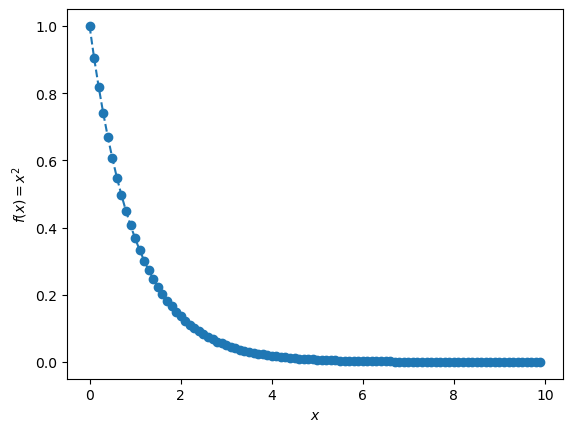

In [18]:
plt.plot(X, Y, 'o--')
plt.xlabel('$x$')
plt.ylabel('$f(x)=x^2$')
plt.show()

In [11]:
X = np.arange(0, 10, 0.1)  # Now we do not include the end point

In [12]:
Y = np.exp(-X)  # again we can have elementwise operation

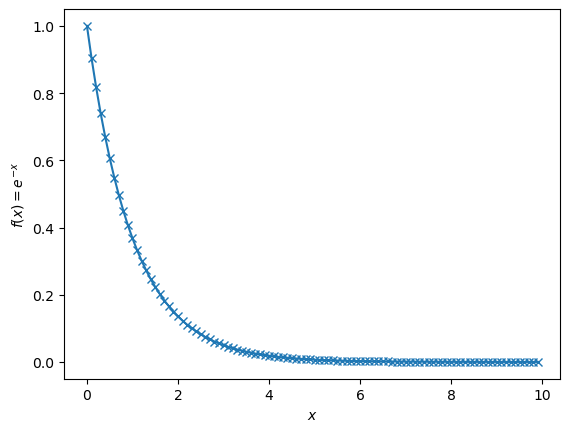

In [20]:
## When there is some exponential relation, sometimes it is hard to directly read from the normal scale
plt.plot(X, Y, 'x-')
plt.xlabel('$x$')
plt.ylabel('$f(x)=e^{-x}$')
plt.show()

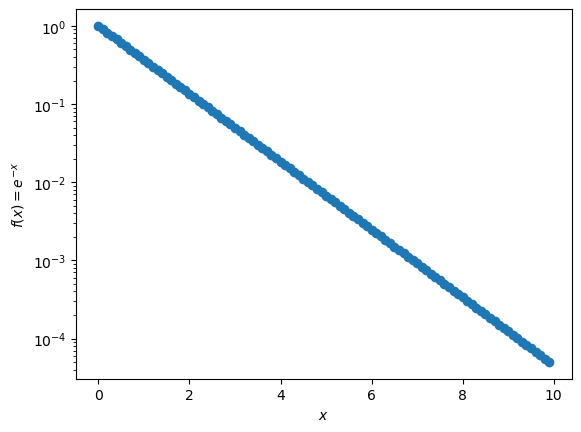

In [24]:
## So one could consider Y in log scale.
## The first way to do this
plt.plot(X, Y, 'o--')
plt.yscale('log')
plt.xlabel('$x$')
plt.ylabel('$f(x)=e^{-x}$')
plt.show()

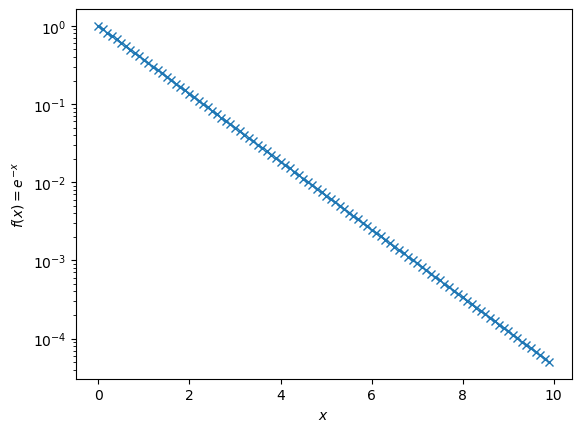

In [25]:
## The second way to do this
plt.semilogy(X, Y, 'x--')
plt.xlabel('$x$')
plt.ylabel('$f(x)=e^{-x}$')
plt.show()

In [28]:
dY = 0.1 * np.random.rand(100)

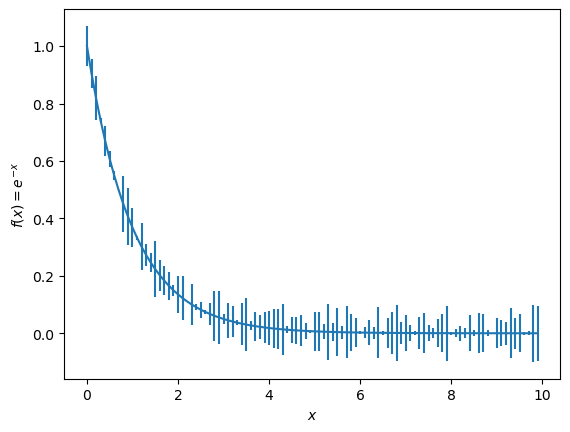

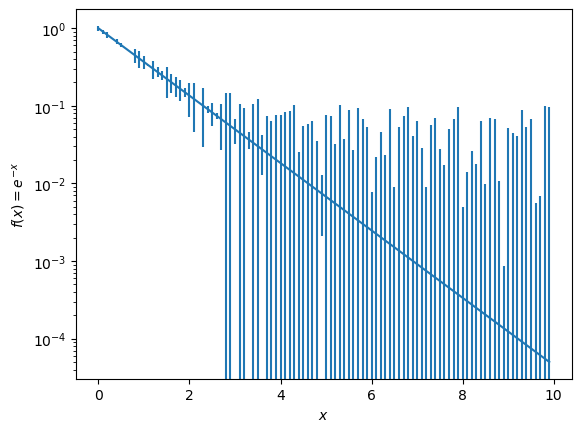

In [32]:
plt.errorbar(X, Y, yerr=dY)
plt.xlabel('$x$')
plt.ylabel('$f(x)=e^{-x}$')
plt.show()

plt.errorbar(X, Y, yerr=dY)
plt.xlabel('$x$')
plt.ylabel('$f(x)=e^{-x}$')
plt.yscale('log')
plt.show()

# Exercise 0.2: Numerical linear algebra methods

First let us define the Pauli matrices

In [49]:
# At least one number should be define with floating point 1".",
# so that the array would be a floating point array. Alternatively,
# add dtype=np.float64 or similar.
sigma_x = np.array([[0., 1.], [1., 0.]])  
sigma_y = np.array([[0, -1j], [1.j, 0.]])
sigma_z = np.array([[1., 0.], [0., -1.]])

print("sig_x : \n", sigma_x)
print("sig_y : \n", sigma_y)
print("sig_z : \n", sigma_z)

sig_x : 
 [[0. 1.]
 [1. 0.]]
sig_y : 
 [[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]
sig_z : 
 [[ 1.  0.]
 [ 0. -1.]]


Now, we can obtain the Hamiltonian of the Heisenberg model (for $L=2$) in the corresponding basis as the $4 \times 4$ matrix

In [44]:
# Here we use np.kron function to perfrom tensor product
H = np.kron(sigma_x, sigma_x) + np.kron(sigma_y, sigma_y) + np.kron(sigma_z, sigma_z)

and find the eigenenergies by exactly diagonalization

In [48]:
W, V = np.linalg.eigh(H)
print("The eigenvalues : ", W)

The eigenvalues :  [-3.  1.  1.  1.]


In [47]:
# The corresponding eigenvector of the smallest eigenvalue, i.e. the ground state
print(V[:,0])  # E=-3

[ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


First thing to know is that the basis of one spin is [up, down].
The basis for two spins from the tensor product is given as [(up, up), (up, down), (down, up), (down, down)]

The ground state $E=-3$ is the singlet state, i.e.
$ | GS \rangle = \frac{1}{\sqrt{2}} | \uparrow \downarrow \rangle - \frac{1}{\sqrt{2}} | \downarrow \uparrow \rangle$

Notice the difference in the scale here. Different from the usually convention in quantum mechanics, we have $\hbar = 1$ and consider directly the pauli operator instead of the spin operator here.

The other three eigenvectors with degenerate eigenenergy $E=1$ correspond to the triple states.

In [51]:
for i in [1, 2, 3]:
    print(V[:, i])

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
[0.+0.j 0.+0.j 0.+0.j 1.+0.j]


`V[:,1]` state corresponds to $ | 1, 1 \rangle = | \uparrow \uparrow \rangle$

`V[:,2]` state corresponds to $ | 1, 0\rangle = \frac{1}{\sqrt{2}} (| \uparrow \downarrow \rangle + | \downarrow \uparrow \rangle)$

`V[:,3]` state corresponds to $ | 1, -1 \rangle = | \downarrow \downarrow \rangle$